<a href="https://colab.research.google.com/github/mendiang/IYKRA-Data-Science-Fellowship-Batch-6/blob/main/Proficiency_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install --upgrade plotly

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import numpy as np
import plotly.express as px
import datetime as dt #for linier regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from IPython.display import HTML

In [3]:
def treemap(categories,title,path,values):
    fig = px.treemap(categories, path=path, values=values, height=700,
                 title=title, color_discrete_sequence = px.colors.sequential.RdBu)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [4]:
url1 = 'https://raw.githubusercontent.com/Syukrondzeko/Crime-Dataset/main/Crime2018.csv'
url2 = 'https://raw.githubusercontent.com/Syukrondzeko/Crime-Dataset/main/Crime2019.csv'
url3 = 'https://raw.githubusercontent.com/Syukrondzeko/Crime-Dataset/main/Crime2020.csv'
my_list = [url1, url2, url3]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in my_list])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
combined_csv['YEAR'].unique()

array([2018, 2019, 2020])

In [6]:
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [7]:
combined_csv.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


In [8]:
combined_csv.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
70889,20063425,3114,NaN,INVESTIGATE PROPERTY,A7,21,0,2020-09-01 00:00:00,2020,9,Tuesday,0,NaN,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)"
70890,20062356,1107,NaN,FRAUD - IMPERSONATION,E18,520,0,2020-08-28 18:39:00,2020,8,Friday,18,NaN,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
70891,20046400,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,0,2020-07-02 01:38:00,2020,7,Thursday,1,NaN,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)"
70892,20038446,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,0,2020-06-03 01:15:00,2020,6,Wednesday,1,NaN,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)"
70893,20030892,540,NaN,BURGLARY - COMMERICAL,C11,380,0,2020-05-03 00:00:00,2020,5,Sunday,0,NaN,GALLIVAN BLVD,42.283700,-71.047761,"(42.2837003080534, -71.0477614298657)"


In [9]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189564 entries, 0 to 70893
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      189564 non-null  object 
 1   OFFENSE_CODE         189564 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null   object 
 3   OFFENSE_DESCRIPTION  189564 non-null  object 
 4   DISTRICT             188527 non-null  object 
 5   REPORTING_AREA       189564 non-null  object 
 6   SHOOTING             91078 non-null   object 
 7   OCCURRED_ON_DATE     189564 non-null  object 
 8   YEAR                 189564 non-null  int64  
 9   MONTH                189564 non-null  int64  
 10  DAY_OF_WEEK          189564 non-null  object 
 11  HOUR                 189564 non-null  int64  
 12  UCR_PART             98868 non-null   object 
 13  STREET               187948 non-null  object 
 14  Lat                  183135 non-null  float64
 15  Long              

In [10]:
# Calculatin the # of NaN values in each row
total = combined_csv.isnull().sum().sort_values(ascending=False)
percent = (combined_csv.isnull().sum()/combined_csv.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(8)

,Total,Percent
SHOOTING,98486,0.519540
UCR_PART,90696,0.478445
OFFENSE_CODE_GROUP,90676,0.478340
Lat,6429,0.033915
Long,6429,0.033915
STREET,1616,0.008525
DISTRICT,1037,0.005470
Location,0,0.000000


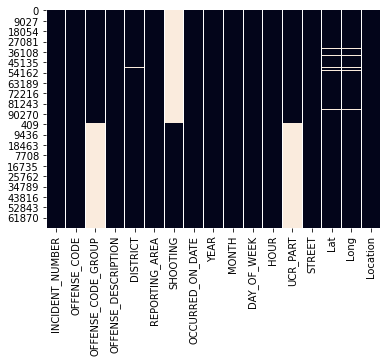

In [11]:
sns.heatmap(combined_csv.isnull(), cbar=False)

In [12]:
# display the unique values of row shootings - and fix
combined_csv['SHOOTING'].unique()

array([nan, 'Y', 0, 1], dtype=object)

In [13]:
combined_csv['SHOOTING'] = combined_csv['SHOOTING'].apply(lambda x: 'N' if x != 'Y' and x != 1 else 'Y')
combined_csv['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [14]:
combined_csv['OFFENSE_CODE_GROUP'].unique()

array(['Investigate Person', 'Larceny', 'Harassment', 'Property Lost',
       'Fraud', 'Auto Theft', 'Counterfeiting', 'Confidence Games',
       'Commercial Burglary', 'Vandalism', 'Other',
       'Missing Person Reported', 'Police Service Incidents',
       'License Plate Related Incidents', 'Residential Burglary',
       'Simple Assault', 'Property Found', 'Larceny From Motor Vehicle',
       'Medical Assistance', 'Motor Vehicle Accident Response',
       'Aggravated Assault', 'Landlord/Tenant Disputes',
       'Investigate Property', 'Auto Theft Recovery',
       'Missing Person Located', 'Embezzlement', 'Violations',
       'Criminal Harassment', 'Disorderly Conduct', 'Warrant Arrests',
       'Other Burglary', 'Restraining Order Violations',
       'Recovered Stolen Property', 'Service', 'Property Related Damage',
       'Robbery', 'Towed', 'Evading Fare', 'License Violation',
       'Verbal Disputes', 'Fire Related Reports', 'Firearm Violations',
       'Search Warrants', 'Opera

In [15]:
combined_csv['UCR_PART'].unique()

array(['Part Three', 'Part One', 'Part Two', 'Other', nan], dtype=object)

In [16]:
combined_csv['OFFENSE_CODE_GROUP'] = combined_csv['OFFENSE_CODE_GROUP'].fillna('unidentified')
combined_csv['UCR_PART'] = combined_csv['UCR_PART'].fillna('unidentified')

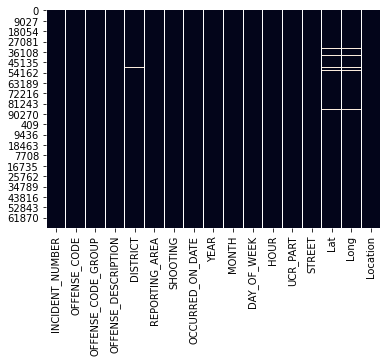

In [17]:
sns.heatmap(combined_csv.isnull(), cbar=False)

In [18]:
combined_csv['DISTRICT'].unique()

array(['B3', 'E18', 'E5', 'A1', 'D4', 'B2', 'C11', 'E13', 'C6', 'D14',
       'A7', 'A15', nan, 'External'], dtype=object)

In [19]:
combined_csv['Lat'].unique()

array([42.27997063, 42.26922388, 42.29076521, ..., 42.38950681,
       42.28265288, 42.35327223])

In [20]:
combined_csv=combined_csv.dropna()

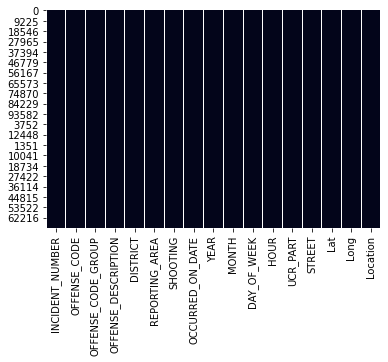

In [21]:
sns.heatmap(combined_csv.isnull(), cbar=False)

In [22]:
combined_csv['YEAR'].unique()

array([2018, 2019, 2020])

In [23]:
combined_csv['OFFENSE_CODE_GROUP'].unique()

array(['Investigate Person', 'Larceny', 'Harassment', 'Property Lost',
       'Fraud', 'Auto Theft', 'Counterfeiting', 'Confidence Games',
       'Commercial Burglary', 'Vandalism', 'Other',
       'Missing Person Reported', 'Police Service Incidents',
       'License Plate Related Incidents', 'Residential Burglary',
       'Simple Assault', 'Property Found', 'Larceny From Motor Vehicle',
       'Medical Assistance', 'Motor Vehicle Accident Response',
       'Aggravated Assault', 'Landlord/Tenant Disputes',
       'Investigate Property', 'Auto Theft Recovery',
       'Missing Person Located', 'Embezzlement', 'Violations',
       'Criminal Harassment', 'Disorderly Conduct', 'Warrant Arrests',
       'Other Burglary', 'Restraining Order Violations',
       'Recovered Stolen Property', 'Service', 'Property Related Damage',
       'Robbery', 'Towed', 'Evading Fare', 'License Violation',
       'Verbal Disputes', 'Fire Related Reports', 'Firearm Violations',
       'Search Warrants', 'Opera

In [24]:
combined_csv['UCR_PART'].unique()

array(['Part Three', 'Part One', 'Part Two', 'Other', 'unidentified'],
      dtype=object)

In [25]:
combined_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
OFFENSE_CODE,181861.0,2314.826246,1212.319976,111.000000,1001.000000,3005.000000,3201.000000,9.999900e+04
YEAR,181861.0,2018.884945,0.937238,2018.000000,2018.000000,2018.000000,2020.000000,2.020000e+03
MONTH,181861.0,7.041752,3.494816,1.000000,4.000000,7.000000,10.000000,1.200000e+01
HOUR,181861.0,12.925888,6.356321,0.000000,9.000000,14.000000,18.000000,2.300000e+01
Lat,181861.0,41.837866,4.501769,-1.000000,42.296288,42.325629,42.348152,4.239504e+01
Long,181861.0,-70.271221,7.554255,-71.178674,-71.097821,-71.077384,-71.061354,5.249691e-08


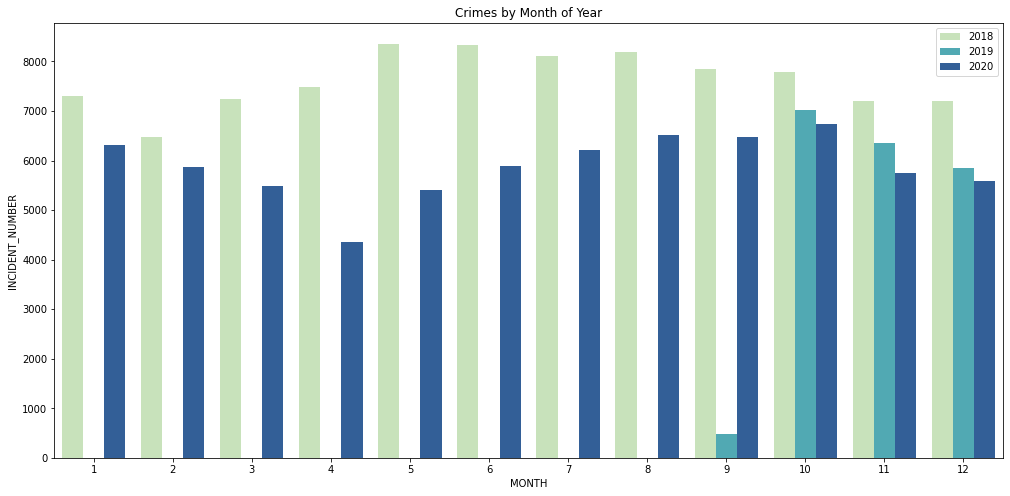

In [26]:
fig, ax = plt.subplots(figsize=(17,8))
# with sns.color_palette("RdGy", 10):
montyearAggregated = pd.DataFrame(combined_csv.groupby(["MONTH","YEAR"])["INCIDENT_NUMBER"].count()).reset_index()
a=sns.barplot(data=montyearAggregated,x="MONTH", y="INCIDENT_NUMBER",hue = 'YEAR', palette='YlGnBu')
a.set_title("Crimes by Month of Year",fontsize=12)
plt.legend(loc='upper right')
plt.show()

#How has crime changed over the years?

####Number Of Crimes Each Year

Text(0.5, 1.0, 'Number Of Crimes Each Year')

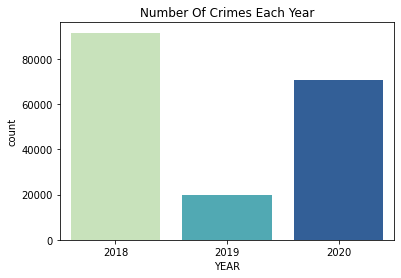

In [27]:
sns.countplot(data=combined_csv, x="YEAR",palette='YlGnBu')
plt.title('Number Of Crimes Each Year')

####Number Of Crimes Each Season

In [28]:
def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
       return "Winter"
    elif(month == 3 or month == 4 or month == 5):
       return "Spring"
    elif(month ==6 or month==7 or month == 8):
       return "Summer"
    else:
       return "Fall"

In [29]:
combined_csv['Season'] = combined_csv.MONTH.apply(getSeason)

Text(0.5, 1.0, 'Number Of Crimes Each Season')

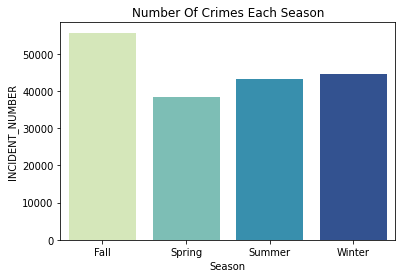

In [30]:
season_counts = combined_csv.groupby('Season').count()['INCIDENT_NUMBER'].to_frame().reset_index()
ax = sns.barplot(x = 'Season' , y="INCIDENT_NUMBER", data = season_counts, palette='YlGnBu')
plt.title('Number Of Crimes Each Season')

Text(0.5, 1.0, 'Number Of Crimes Each Month')

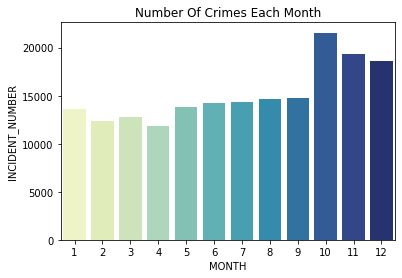

In [31]:
month_counts = combined_csv.groupby('MONTH').count()['INCIDENT_NUMBER'].to_frame().reset_index()
ax = sns.barplot(x = 'MONTH' , y="INCIDENT_NUMBER", data = month_counts, palette='YlGnBu')
plt.title('Number Of Crimes Each Month')

  DAY_OF_WEEK  INCIDENT_NUMBER
0      Friday            27502
1      Monday            26613
2    Saturday            25152
3      Sunday            22869
4    Thursday            26607
5     Tuesday            26262
6   Wednesday            26856


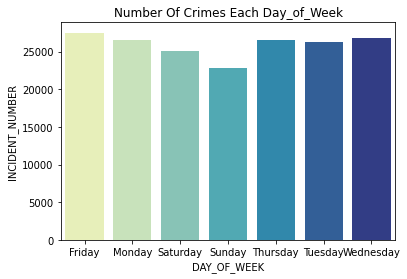

In [32]:
day_counts = combined_csv.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].to_frame().reset_index()
ax = sns.barplot(x = 'DAY_OF_WEEK' , y="INCIDENT_NUMBER", data = day_counts, palette='YlGnBu')
plt.title('Number Of Crimes Each Day_of_Week')
print(day_counts)

Text(-8.699999999999996, 0.5, 'Count')

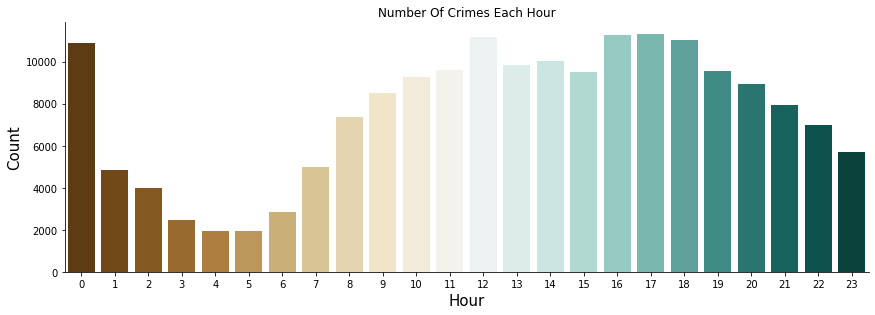

In [33]:
sns.catplot(x='HOUR',
           kind='count',
            height=4, 
            aspect=3,
            palette='BrBG',
            #color='BrBG',
           data=combined_csv)
plt.title('Number Of Crimes Each Hour')
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Count', fontsize=15)

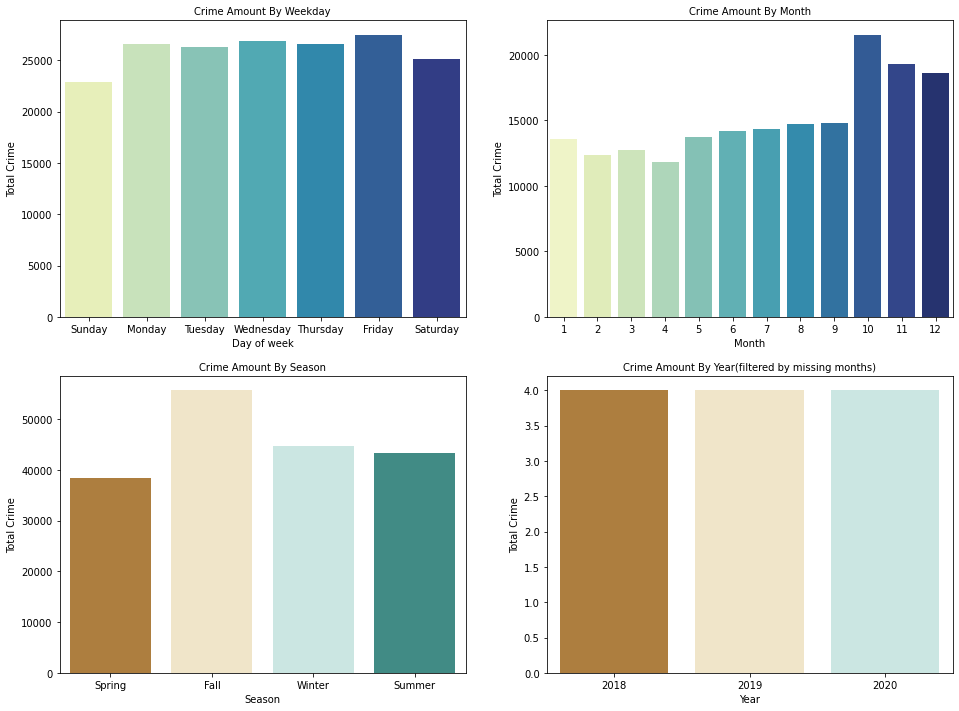

In [34]:
df_year_new = combined_csv.groupby(["YEAR","MONTH"])["INCIDENT_NUMBER"].count().reset_index()
df_year_filter = df_year_new[~df_year_new['MONTH'].isin(['1','2','3','4','5','6','7','8'])]
fig,axes= plt.subplots(2,2)
fig.set_size_inches(16,12)
with sns.color_palette('BrBG',4):
  a=sns.countplot(x="DAY_OF_WEEK",order=['Sunday','Monday','Tuesday','Wednesday',
                                         'Thursday','Friday','Saturday'],data=combined_csv,ax=axes[0, 0],palette='YlGnBu')
  a.set(xlabel='Day of week', ylabel='Total Crime')
  a.set_title("Crime Amount By Weekday",fontsize=10)

  b=sns.countplot(x="MONTH",data=combined_csv,ax=axes[0, 1],palette='YlGnBu')
  b.set(xlabel='Month', ylabel='Total Crime')
  b.set_title("Crime Amount By Month",fontsize=10)

  c=sns.countplot(x="Season",data=combined_csv,ax=axes[1, 0])
  c.set(xlabel='Season', ylabel='Total Crime')
  c.set_title("Crime Amount By Season",fontsize=10)

  d=sns.countplot(x="YEAR",data=df_year_filter,ax=axes[1, 1])
  d.set(xlabel='Year', ylabel='Total Crime')
  d.set(xlabel='Year', ylabel='Total Crime')
  d.set_title("Crime Amount By Year(filtered by missing months)",fontsize=10);

In [35]:
combined_csv["OCCURRED_ON_DATE"] = combined_csv["OCCURRED_ON_DATE"].apply(pd.to_datetime, errors='coerce')
combined_csv["OCCURRED_ON_DATE"] = combined_csv["OCCURRED_ON_DATE"].dt.date
combined_csv["OCCURRED_ON_DATE"] = combined_csv["OCCURRED_ON_DATE"].apply(pd.to_datetime, errors='coerce')

In [36]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181861 entries, 0 to 70893
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      181861 non-null  object        
 1   OFFENSE_CODE         181861 non-null  int64         
 2   OFFENSE_CODE_GROUP   181861 non-null  object        
 3   OFFENSE_DESCRIPTION  181861 non-null  object        
 4   DISTRICT             181861 non-null  object        
 5   REPORTING_AREA       181861 non-null  object        
 6   SHOOTING             181861 non-null  object        
 7   OCCURRED_ON_DATE     181861 non-null  datetime64[ns]
 8   YEAR                 181861 non-null  int64         
 9   MONTH                181861 non-null  int64         
 10  DAY_OF_WEEK          181861 non-null  object        
 11  HOUR                 181861 non-null  int64         
 12  UCR_PART             181861 non-null  object        
 13  STREET         

Text(0.05, 0.95, 'Timeline of the most frequent crimes(2018-2020).')

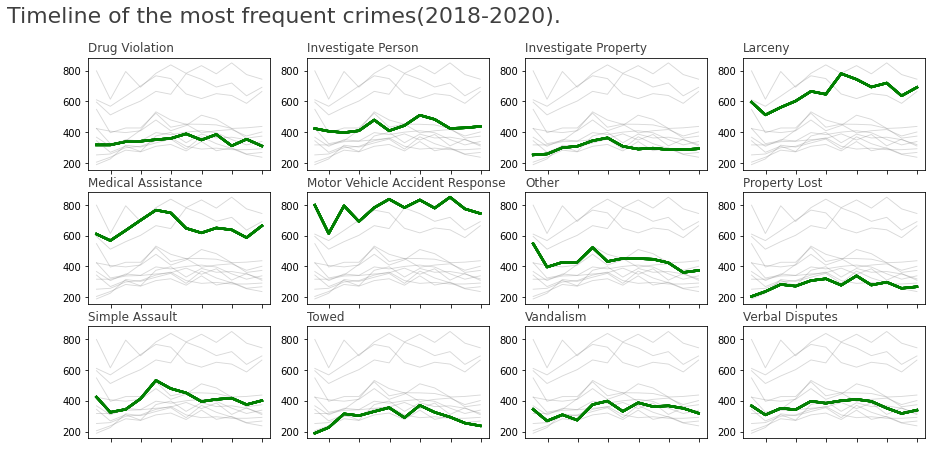

In [37]:
exlude_data = combined_csv[combined_csv.OFFENSE_CODE_GROUP != 'unidentified']

ten_freq_crimes = exlude_data["OFFENSE_CODE_GROUP"].value_counts()[:12]
df_top_crimes = exlude_data[exlude_data["OFFENSE_CODE_GROUP"].isin(ten_freq_crimes.index)]
df_tp = df_top_crimes.pivot_table(index=df_top_crimes["OCCURRED_ON_DATE"],
                                                      columns=["OFFENSE_CODE_GROUP"],aggfunc="size", fill_value=0).resample("M").sum()

#palette = plt.get_cmap('Set2')
num=0
ax,fix = plt.subplots(figsize=(15,7))
for column in df_tp:
    num+=1
    plt.subplot(3,4, num)
    for v in df_tp:
        plt.plot(df_tp.index,v,data=df_tp,marker='', color='grey', linewidth=0.9, alpha=0.3)
        plt.tick_params(labelbottom=False)
        plt.plot(df_tp.index,column, data=df_tp,color="green", linewidth=2.4, alpha=0.75, label=column)
        plt.title(column, loc='left', fontsize=12, fontweight=0, color="black", alpha=0.75)
ax.text(x=0.05,y=0.95,s="Timeline of the most frequent crimes(2018-2020).",alpha=0.75, fontsize=22)

In [38]:
Number_crimes = exlude_data['OFFENSE_CODE_GROUP'].value_counts()
values = Number_crimes.values
categories = pd.DataFrame(data=Number_crimes.index, columns=["OFFENSE_CODE_GROUP"])
categories['values'] = values

In [39]:
treemap(categories,'Major Crimes in Boston',['OFFENSE_CODE_GROUP'],categories['values'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



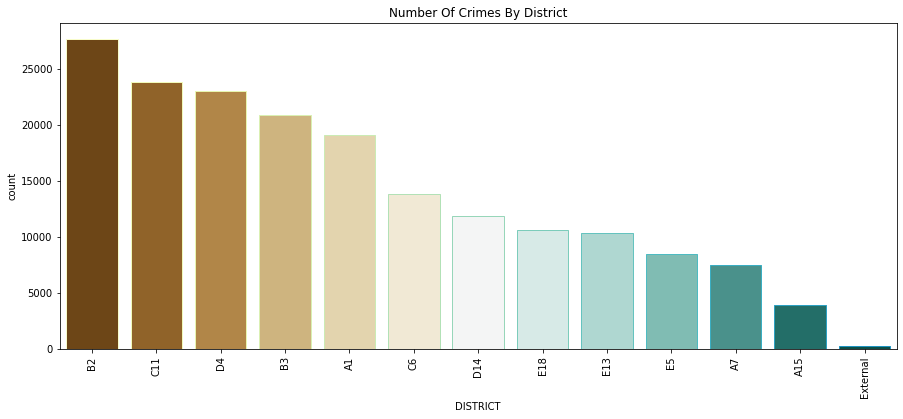

In [40]:
plt.subplots(figsize=(15,6))
sns.countplot('DISTRICT',palette='BrBG',data=combined_csv, edgecolor=sns.color_palette('YlGnBu',20),order=combined_csv['DISTRICT'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Crimes By District')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



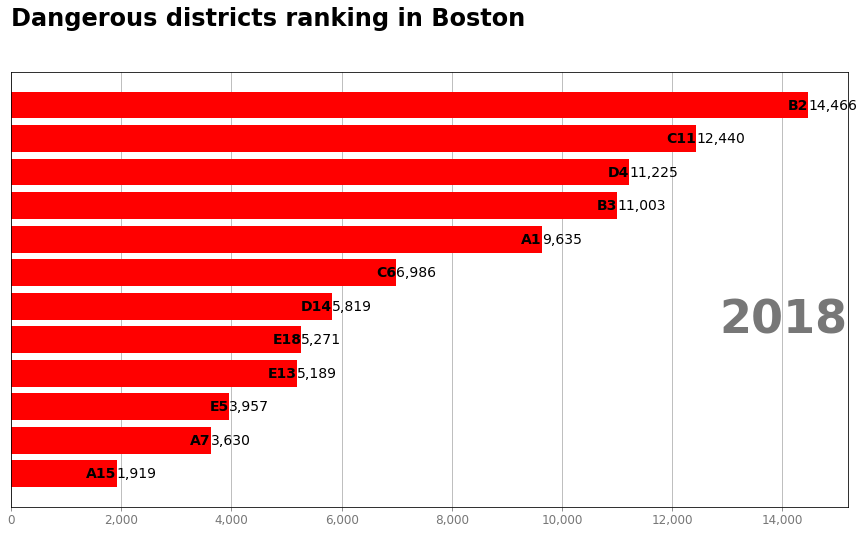

In [41]:
df11= combined_csv[['DISTRICT','YEAR','STREET']]
df11['Number of crimes'] =1 
df11 = df11.groupby(['YEAR','DISTRICT'], as_index=False)['Number of crimes'].sum()
df11['cumsum'] = df11['Number of crimes'].groupby(df11['DISTRICT']).cumsum()

def draw_barchart(current_year):
    df12 = df11[df11['YEAR'].eq(current_year)].sort_values(by='cumsum', ascending=True).tail(12)
    
    ax.clear()
    ax.barh(df12['DISTRICT'], df12['cumsum'], color = "red")
    dx = df12['cumsum'].max()
    
    for i, (cumsum , district) in enumerate(zip(df12['cumsum'], df12['DISTRICT'])):
        ax.text(cumsum, i, district, size=14, weight=600, ha='right', va='center')
        ax.text(cumsum, i, f'{cumsum:,.0f}', size=14, ha='left',  va='center')
    
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('bottom')
    
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Dangerous districts ranking in Boston',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames = df11.YEAR.unique())
HTML(animator.to_jshtml())

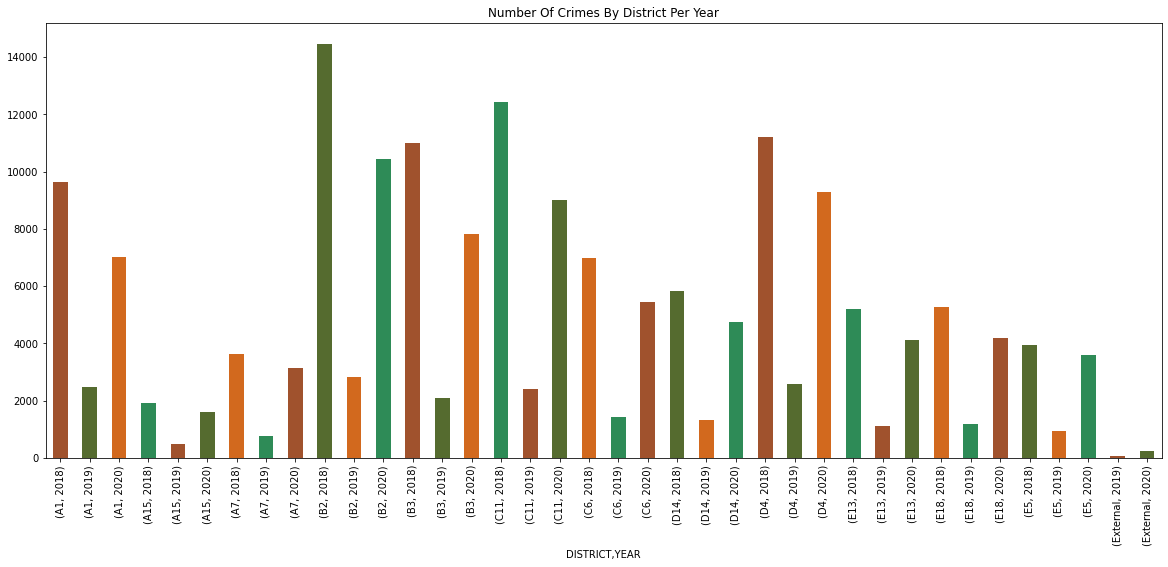

In [42]:
plt.figure(figsize=(20,8))
combined_csv.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].plot.bar(color = ['sienna', 'darkolivegreen', 'chocolate', 'seagreen'])
plt.title('Number Of Crimes By District Per Year')
plt.show()

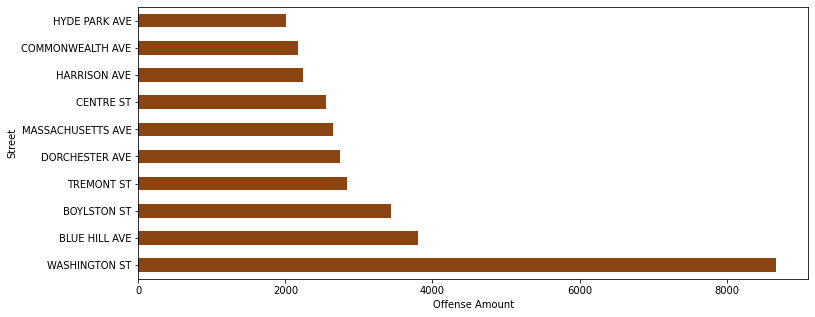

In [43]:
fig = plt.figure(figsize=(12,5))
crime_street = combined_csv.groupby('STREET')['INCIDENT_NUMBER'].count().nlargest(10)
crime_street.plot(kind='barh', color ="saddlebrown")
plt.xlabel("Offense Amount")
plt.ylabel("Street")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



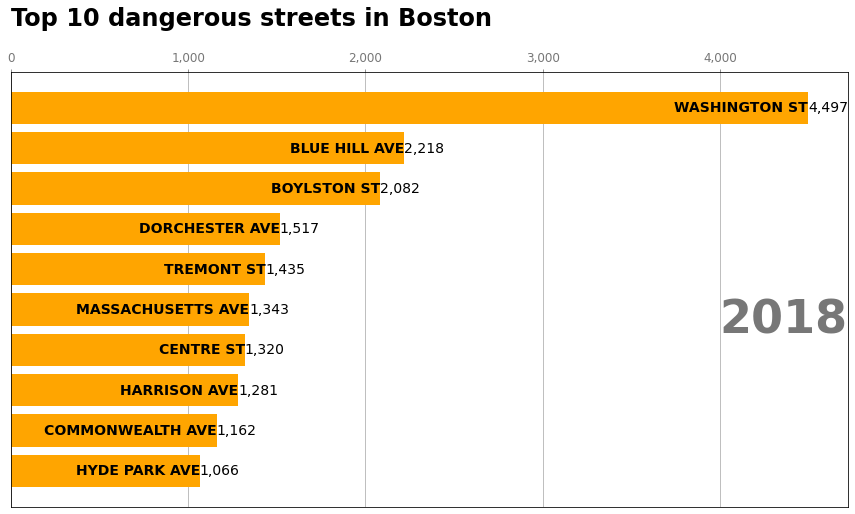

In [44]:
df14=combined_csv[['DISTRICT','YEAR','STREET']]
df14['Number of crimes'] =1 
df14 = df14.groupby(['YEAR','STREET'], as_index=False)['Number of crimes'].sum()
df14['cumsum'] = df14['Number of crimes'].groupby(df14['STREET']).cumsum()
def draw_barchart1(current_year):
    df13 = df14[df14['YEAR'].eq(current_year)].sort_values(by='cumsum', ascending=True).tail(10)
    
    ax.clear()
    ax.barh(df13['STREET'], df13['cumsum'], color = "orange")
    dx = df13['cumsum'].max()
    
    for i, (cumsum , district) in enumerate(zip(df13['cumsum'], df13['STREET'])):
        ax.text(cumsum, i, district, size=14, weight=600, ha='right', va='center')
        ax.text(cumsum, i, f'{cumsum:,.0f}', size=14, ha='left',  va='center')
    
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Top 10 dangerous streets in Boston',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart1, frames = df14.YEAR.unique())
HTML(animator.to_jshtml())

In [45]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181861 entries, 0 to 70893
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      181861 non-null  object        
 1   OFFENSE_CODE         181861 non-null  int64         
 2   OFFENSE_CODE_GROUP   181861 non-null  object        
 3   OFFENSE_DESCRIPTION  181861 non-null  object        
 4   DISTRICT             181861 non-null  object        
 5   REPORTING_AREA       181861 non-null  object        
 6   SHOOTING             181861 non-null  object        
 7   OCCURRED_ON_DATE     181861 non-null  datetime64[ns]
 8   YEAR                 181861 non-null  int64         
 9   MONTH                181861 non-null  int64         
 10  DAY_OF_WEEK          181861 non-null  object        
 11  HOUR                 181861 non-null  int64         
 12  UCR_PART             181861 non-null  object        
 13  STREET         

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



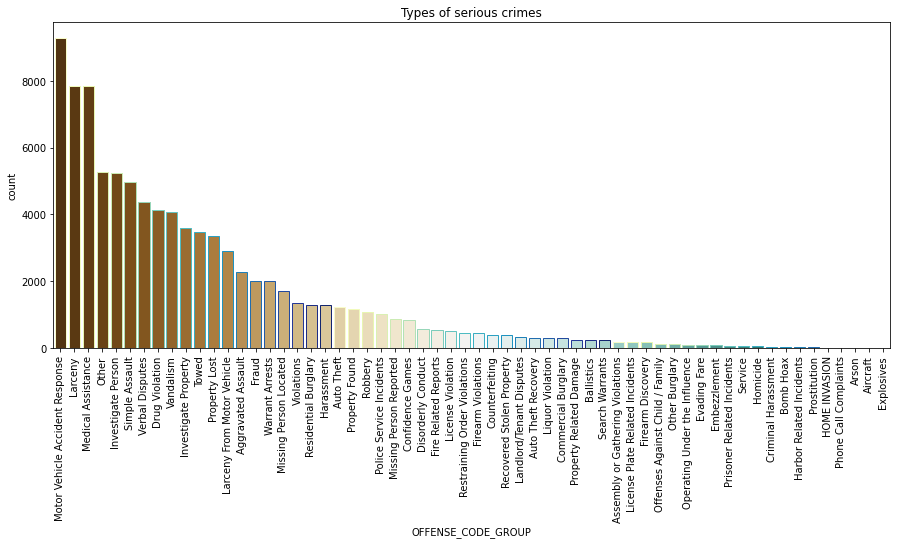

In [46]:
plt.subplots(figsize=(15,6))
sns.countplot('OFFENSE_CODE_GROUP',palette='BrBG',data=exlude_data,edgecolor=sns.color_palette('YlGnBu',20),order=exlude_data['OFFENSE_CODE_GROUP'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Types of serious crimes')
plt.show()

In [47]:
combined_csv['day_night'] = np.where(np.logical_and(np.greater(combined_csv["HOUR"],6), np.less(combined_csv["HOUR"], 18)), 'Day', 'Night')
combined_csv.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Season,day_night
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,N,2018-04-30,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",Spring,Day
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,N,2018-03-06,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",Spring,Day
2,I192076660,2629,Harassment,HARASSMENT,E5,662,N,2018-10-31,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",Fall,Day
3,I192075386,2629,Harassment,HARASSMENT,A1,96,N,2018-04-09,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",Spring,Day
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,N,2018-01-01,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",Winter,Night


In [48]:
#find about day
day_data = combined_csv.loc[combined_csv["day_night"]=='Day']
count1 = day_data.groupby('day_night')['INCIDENT_NUMBER'].count()

#find about night
night_data = combined_csv.loc[combined_csv["day_night"]=='Night']
count2 = night_data.groupby('day_night')['INCIDENT_NUMBER'].count()

print (count1, "\n", count2, "\n")

day_night
Day    102823
Name: INCIDENT_NUMBER, dtype: int64 
 day_night
Night    79038
Name: INCIDENT_NUMBER, dtype: int64 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



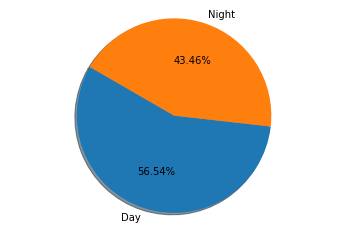

In [49]:
plt.pie([count1,count2],labels=["Day","Night"],autopct='%1.2f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.show()

#Prepare for Model


In [50]:
dataR = pd.DataFrame(combined_csv.groupby(["OCCURRED_ON_DATE","DISTRICT"])["INCIDENT_NUMBER"].count().reset_index())
dataR.head()

,OCCURRED_ON_DATE,DISTRICT,INCIDENT_NUMBER
0,2018-01-01,A1,30
1,2018-01-01,A15,4
2,2018-01-01,A7,7
3,2018-01-01,B2,36
4,2018-01-01,B3,34


In [51]:
dataR.isnull().sum() #we have 1113 null value on day feature if we get day column from original dataset, so we can create from occured_on_date

OCCURRED_ON_DATE    0
DISTRICT            0
INCIDENT_NUMBER     0
dtype: int64

In [52]:
dataR

,OCCURRED_ON_DATE,DISTRICT,INCIDENT_NUMBER
0,2018-01-01,A1,30
1,2018-01-01,A15,4
2,2018-01-01,A7,7
3,2018-01-01,B2,36
4,2018-01-01,B3,34
...,...,...,...
10087,2020-12-31,D4,23
10088,2020-12-31,E13,9
10089,2020-12-31,E18,27
10090,2020-12-31,E5,11


In [53]:
dataR.OCCURRED_ON_DATE.nunique()  

825

In [54]:
dataR['Day'] = dataR['OCCURRED_ON_DATE'].dt.dayofweek
days = ( 1,2,3,4,5,6,7) # starts w monday
dataR['Day'] = dataR['Day'].apply(lambda x: days[x])

In [55]:
dataR = pd.concat([dataR,pd.get_dummies(dataR['DISTRICT'], prefix='O')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
dataR.drop(['DISTRICT'],axis=1, inplace=True)

In [56]:
dataR

,OCCURRED_ON_DATE,INCIDENT_NUMBER,Day,O_A1,O_A15,O_A7,O_B2,O_B3,O_C11,O_C6,O_D14,O_D4,O_E13,O_E18,O_E5,O_External
0,2018-01-01,30,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-01,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2018-01-01,36,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2018-01-01,34,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10087,2020-12-31,23,4,0,0,0,0,0,0,0,0,1,0,0,0,0
10088,2020-12-31,9,4,0,0,0,0,0,0,0,0,0,1,0,0,0
10089,2020-12-31,27,4,0,0,0,0,0,0,0,0,0,0,1,0,0
10090,2020-12-31,11,4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
dataR.iloc[:, 3:16] = dataR.iloc[:, 3:16].astype(np.int64)

In [58]:
dataR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10092 entries, 0 to 10091
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OCCURRED_ON_DATE  10092 non-null  datetime64[ns]
 1   INCIDENT_NUMBER   10092 non-null  int64         
 2   Day               10092 non-null  int64         
 3   O_A1              10092 non-null  int64         
 4   O_A15             10092 non-null  int64         
 5   O_A7              10092 non-null  int64         
 6   O_B2              10092 non-null  int64         
 7   O_B3              10092 non-null  int64         
 8   O_C11             10092 non-null  int64         
 9   O_C6              10092 non-null  int64         
 10  O_D14             10092 non-null  int64         
 11  O_D4              10092 non-null  int64         
 12  O_E13             10092 non-null  int64         
 13  O_E18             10092 non-null  int64         
 14  O_E5              1009

In [59]:
# import datetime as dt  # convert date to ordinal for linear regression 
dataR['OCCURRED_ON_DATE'] = pd.to_datetime(dataR['OCCURRED_ON_DATE'])
dataR['OCCURRED_ON_DATE'] = dataR['OCCURRED_ON_DATE'].map(dt.datetime.toordinal)
# "TypeError: invalid type promotion"

In [60]:
dataR

,OCCURRED_ON_DATE,INCIDENT_NUMBER,Day,O_A1,O_A15,O_A7,O_B2,O_B3,O_C11,O_C6,O_D14,O_D4,O_E13,O_E18,O_E5,O_External
0,736695,30,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,736695,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,736695,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,736695,36,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,736695,34,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10087,737790,23,4,0,0,0,0,0,0,0,0,1,0,0,0,0
10088,737790,9,4,0,0,0,0,0,0,0,0,0,1,0,0,0
10089,737790,27,4,0,0,0,0,0,0,0,0,0,0,1,0,0
10090,737790,11,4,0,0,0,0,0,0,0,0,0,0,0,1,0


#Model 1: Predict for each day (Base-model)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(dataR.drop(columns=["INCIDENT_NUMBER"]), dataR["INCIDENT_NUMBER"], random_state = 42)

In [62]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7102710843082596


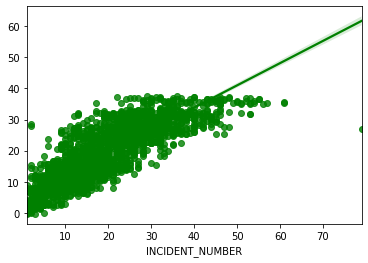

In [63]:
ax = sns.regplot(x=y_test, y=y_test_pred, color="g")

In [64]:
print("R2 Score: ",r2_score(y_test, y_test_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 Score:  0.7102710843082596
MAE: 4.416938739180357
MSE: 35.12947630976478
RMSE: 5.92701242699598
